In [4]:
# from google.colab import files
# uploaded = files.upload()

In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline

In [6]:
df = pd.read_csv('tennis.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'tennis.csv'

In [ ]:
df.info()

In [ ]:
labelencoder = LabelEncoder()

labelencoder.fit(df['windy'])
df['windy'] = labelencoder.transform(df['windy'])

df

In [ ]:
df = pd.get_dummies(df, columns = ['outlook', 'temp', 'humidity'])
df

In [ ]:
X = df.loc[:, df.columns != 'play']
y = df.play

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = .10, random_state = 42)

print (X_train.shape)
print (X_test.shape)

print (y_train.shape)
print (y_test.shape)

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

In [ ]:
feature_name = X.columns
target_name = df.columns[1] 
print(target_name)

In [ ]:


dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,feature_names=feature_name,  
class_names=target_name, filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

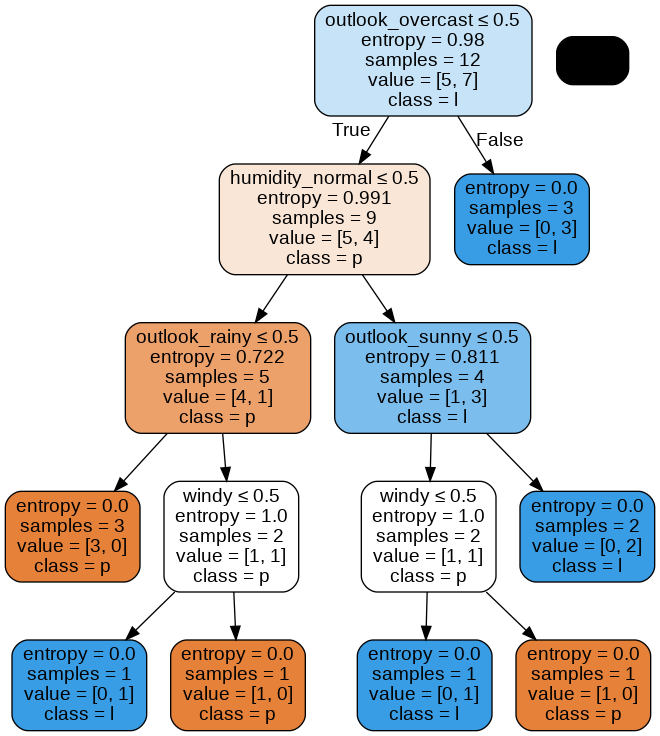

In [ ]:
Image(graph.create_png())
